# MapOfScience Covid-19

In [83]:
import re
import csv
import itertools

In [85]:
with open('pubmed-SARS-CoV2m-set.txt', encoding="utf8") as f:
    info = f.read()

In [86]:
info = re.sub(r'\n\s{6}', ' ', info)

In [87]:
print(info[:2000])

PMID- 32970329
OWN - NLM
STAT- MEDLINE
DCOM- 20210302
LR  - 20210302
IS  - 1096-9071 (Electronic)
IS  - 0146-6615 (Print)
IS  - 0146-6615 (Linking)
VI  - 93
IP  - 3
DP  - 2021 Mar
TI  - Genomic and proteomic mutation landscapes of SARS-CoV-2.
PG  - 1702-1721
LID - 10.1002/jmv.26548 [doi]
AB  - The ongoing pandemic caused by a novel coronavirus, Severe Acute Respiratory  Syndrome Coronavirus 2 (SARS-CoV-2), affects thousands of people every day  worldwide. Hence, drugs and vaccines effective against all variants of SARS-CoV-2  are crucial today. Viral genome mutations exist commonly which may impact the  encoded proteins, possibly resulting to varied effectivity of detection tools and  disease treatment. Thus, this study surveyed the SARS-CoV-2 genome and proteome and  evaluated its mutation characteristics. Phylogenetic analyses of SARS-CoV-2 genes  and proteins show three major clades and one minor clade (P6810S; ORF1ab). The  overall frequency and densities of mutations in the genes 

In [88]:
codes = re.findall(r'AD.+, (.+[a-z-A-Z]).  ?Electronic|AD.+, (.+[a-z-A-Z]).  [^\s<>"]+@[^\s<>"]+|AD.+, (.+[a-z-A-Z]). [^\s<>"]+@[^\s<>"]+|AD.+,  ?(.+[a-z-A-Z]).?|', info)

basic_list = itertools.chain(*codes)
basic_list=list(basic_list)
basic_list

FR_List = [] 
for element in basic_list:
    if element not in FR_List:
        FR_List.append(element)

FR_List[:40]

['',
 'Philippines',
 'Italy',
 'USA',
 ' Switzerland',
 'Switzerland',
 'Germany',
 'Serbia',
 'Greece',
 'Japan',
 "People's Republic of China",
 "People's Republic of  China",
 'Spain',
 'China',
 'Saudi  Arabia',
 'Sudan',
 'UK',
 'South Africa',
 'United States',
 'Canada',
 'India',
 ' India',
 'Republic of Korea',
 'Taiwan',
 'France',
 'Belgium',
 'Sweden',
 'SEMERGEN',
 'Uruguay',
 'South  Africa',
 'Chapel Hill (M.S.C',
 'Ireland',
 'United States of America',
 'Israel',
 'Iran',
 'Maldives',
 'P.R. China',
 'Pakistan',
 'Kuwait',
 'P.R.  China']

In [89]:
unique_zipcodes = list(set(FR_List))
unique_zipcodes.sort()
unique_zipcodes[:10]

['',
 ' Australia',
 ' Austria',
 ' Bagalkot',
 ' Banglades',
 ' Bangladesh',
 ' Belgium',
 ' Brazil',
 ' CT 06520; brett.lindenbach@yale.ed',
 ' Cambridge, U']

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
local = pd.read_csv('countries.csv', engine='python', skipfooter=3)
local.head(6)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania


In [93]:
local = local[local.name.isin(FR_List)]
local.head(10)

,country,latitude,longitude,name
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
10,AR,-38.416097,-63.616672,Argentina
12,AT,47.516231,14.550072,Austria
13,AU,-25.274398,133.775136,Australia
15,AZ,40.143105,47.576927,Azerbaijan
16,BA,43.915886,17.679076,Bosnia and Herzegovina
18,BD,23.684994,90.356331,Bangladesh


In [94]:
ubication =pd.concat([local]).drop_duplicates().sort_values('name')

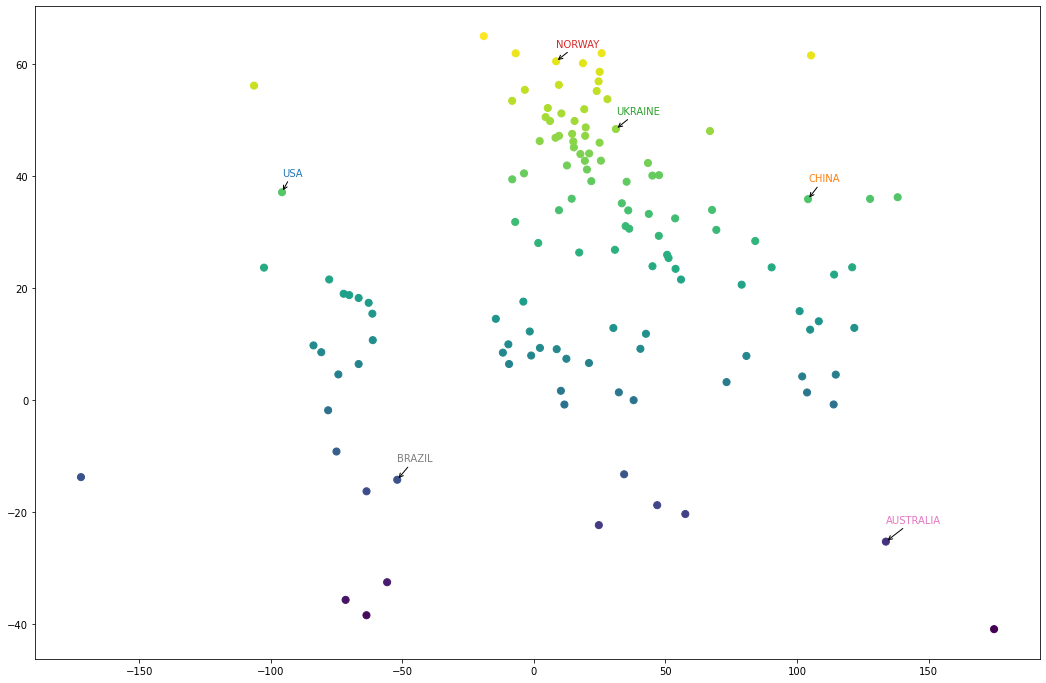

In [95]:
plt.scatter(ubication.longitude, ubication.latitude, s=50, c=ubication.latitude)

ard = dict(arrowstyle="->")
plt.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard,color = 'tab:blue')
plt.annotate('UKRAINE', xy = (31.16558,48.379433), 
               xytext = (31.16558,51), arrowprops= ard,color = 'tab:green')
plt.annotate('BRAZIL', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -11), arrowprops= ard,color = 'tab:grey')
plt.annotate('CHINA', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard,color = 'tab:orange')
plt.annotate('AUSTRALIA', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -22), arrowprops= ard,color = 'tab:pink')
plt.annotate('NORWAY', xy = (8.468946, 60.472024), 
               xytext = (8.468946, 63), arrowprops= ard,color = 'tab:red')

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )